Title: 2022-11-07 Machine Learning Assignment 1

To:&nbsp;&nbsp;&nbsp;&nbsp; Magnimind

From: Matt Curcio, matt.curcio.ri@gmail.com

Date: 2022-10-30

Re:&nbsp;&nbsp;&nbsp; Iris Dataset EDA & KNN Modeling

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Iris-Dataset---KNN-Modeling" data-toc-modified-id="Iris-Dataset---KNN-Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Iris Dataset - KNN Modeling</a></span><ul class="toc-item"><li><span><a href="#Initial-Data-Analysis" data-toc-modified-id="Initial-Data-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initial Data Analysis</a></span></li><li><span><a href="#Build-KNeighborsClassifier-w/-Iris-Data" data-toc-modified-id="Build-KNeighborsClassifier-w/-Iris-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Build KNeighborsClassifier w/ Iris Data</a></span></li><li><span><a href="#Predict-data_point-=-[5,-1.9,-1,-0.2]" data-toc-modified-id="Predict-data_point-=-[5,-1.9,-1,-0.2]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Predict data_point = [5, 1.9, 1, 0.2]</a></span></li></ul></li><li><span><a href="#EDA:-Auto-MPG-dataset" data-toc-modified-id="EDA:-Auto-MPG-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA: Auto-MPG dataset</a></span><ul class="toc-item"><li><span><a href="#Initial-Data-Analysis" data-toc-modified-id="Initial-Data-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initial Data Analysis</a></span></li><li><span><a href="#BONUS:-Visualize-the-relationships-between-these-data-points." data-toc-modified-id="BONUS:-Visualize-the-relationships-between-these-data-points.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>BONUS: Visualize the relationships between these data points.</a></span></li></ul></li></ul></div>

# Iris Dataset - KNN Modeling

![](https://live.staticflickr.com/1341/534526381_78710919d1_n.jpg)

**Iris dataset**

The iris data analyzed for this project was collected by E.Anderson in northeast Canada. It consists of 50 samples from each of three species of Iris

1. Iris setosa, 
2. Iris virginica,
3. Iris versicolor

Four features were measured from each sample: 
- length and width of the sepals and petals, in centimeters.

[Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

**K-nearest neighbors algorithm**

>The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. 
>
>[IBM](https://www.ibm.com/topics/knn)

**Goals**:
- Use k-neighbors classifier (nearest neighbor = 1) using sklearn-KNeighborsClassifier
- Fit the model to your train dataset
- Predict what class the data point [5, 1.9, 1, 0.2] belongs to using KNN.

## Initial Data Analysis

**Load iris from ScikitLearn**

In [ ]:
from __future__ import print_function, division
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time


#Load then assign the dataset to X and the target values to y.
iris = load_iris()
X = iris.data
y = iris.target

#iris.feature_names
#iris

**iris dataset.keys**

In [ ]:
# import data
iris.keys()

**iris target names**

In [ ]:
iris.target_names

**iris.feature_names**

In [ ]:
iris.feature_names

**iris dataset type**

In [ ]:
type(iris)

**iris dataset shape**

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.shape

**df head(5)**

In [ ]:
df.head(5)

**type of iris dataset target**

In [ ]:
type(iris.target_names)

**shape of iris dataset target variable**

In [ ]:
print('\nDimensions of Y =', y.shape)

**Print all iris target values**

In [ ]:
y

**find numpy.unique values**

In [ ]:
np.unique(y)

**split dataset: train & test**

In [ ]:
X = df
y = iris.target # Target data of income

# Randomixe data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

**Print train/test dataset shapes**

In [ ]:
print('\nX_train dimensions = ', X_train.shape)
print('\nX_test  dimensions = ', X_test.shape)

percent_train_test = (X_train.shape[0])/(X_train.shape[0] + X_test.shape[0])
print('\nRatio of X_train.shape to X_total =', 100*round(percent_train_test, 3), '\b%')

## Build KNeighborsClassifier w/ Iris Data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

**KNeighborsClassifier(n_neighbors=1)**

In [ ]:
# KNeighborsClassifier(n_neighbors=1)

start_time = time.perf_counter()

# Instantiate learning model (n = 1)
classifier = KNeighborsClassifier(n_neighbors=1)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('\nTime to run KNN =', round(1000*(time.perf_counter() - start_time), 2), 'millisec')

In [ ]:
print("Test set predictions: {}".format(classifier.predict(X_test)))

**Confusion matrix(y_test, y_pred)**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# Calculating model accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('\nKNN Model Accuracy = ' + str(round(accuracy, 2)) + '%.')

In [ ]:
# Visualize confusion matrix
plt.imshow(cm, cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(3)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

## Predict data_point = [5, 1.9, 1, 0.2]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

predict = [5, 1.9, 1 ,0.2] # single data point with 4 features
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

knn.predict([predict])

In [ ]:
print('\nThe predicted class for the datapoint [5, 1.9, 1 ,0.2] is', iris['target_names'][0], '\b.\n')

# EDA: Auto-MPG dataset

>The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes. 
>
>Quinlan, 1993, [UCI.edu](https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG)

- Dataset `auto_mpg.csv` is located at: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG

## Initial Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Import auto_mpg.csv dataset**

In [2]:
!ls

'2022-11-20 ML Pima Indian Data 2.ipynb'   auto_mpg.csv
'2022-11-23 ML No.3.ipynb'		   auto-mpg_w_qmark.csv
'2022-NOT DONE ML No.1.ipynb'		   pima-indians-diabetes.csv
 archive.zip


In [4]:
data = pd.read_csv('auto_mpg.csv')

**Print the first three samples**

In [5]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


**Print the index range of the observations**

In [6]:
data.shape

(398, 9)

**Print column names**

In [7]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

**Assign mpg column to variable y and rest to variable x.**
- And name it as y and the rest of the data as the features and assign it to X. Print the shape of X.

In [8]:
y = data['mpg']
x = data.drop('mpg', axis=1)

x.shape, y.shape

((398, 8), (398,))

**BONUS: Check dataset for missing values with isnull().any()**

In [9]:
x.isnull().any()

cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

**Check the data types of each feature**
- Which columns are continuous and which are categorical?

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


**NOTE 1**: Dtype = {int64, float64} are continous variables, while `car_name` is an object/string data type.

**Look at the unique elements of horsepower**

In [12]:
x.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       104., 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

**Describe data set**

In [14]:
x.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**Describe the mpg feature**

In [16]:
y.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

**Visualize the distributions**
- Use hist method, use bins=20 for visualization

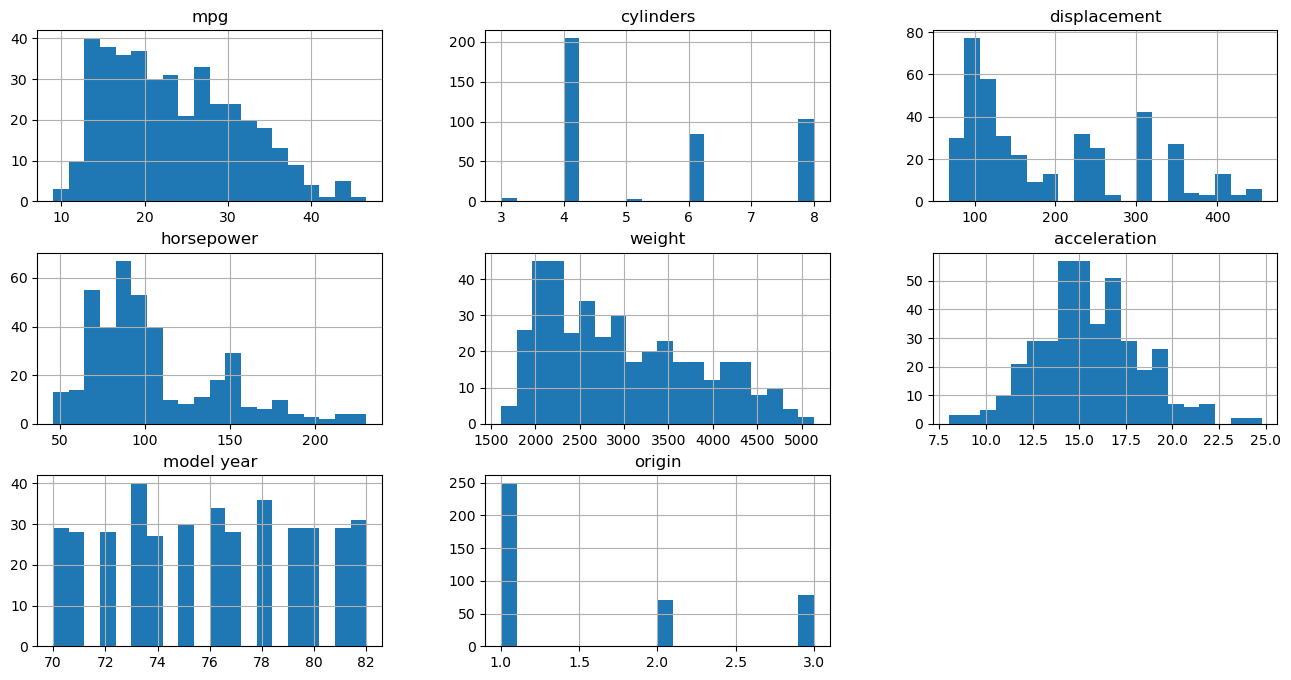

In [17]:
data.hist(bins=20, figsize=(16,8));

## BONUS: Visualize the relationships between these data points.

- Create a function to scale your dataset by using the formula. $𝑏 = \frac{𝑥−𝑚𝑖𝑛}{𝑚𝑎𝑥−𝑚𝑖𝑛}$
- Using this function, scale displacement, horsepower, acceleration, weight, and mpg.
- Create a boxplot of mpg for different origin values before and after scaling.

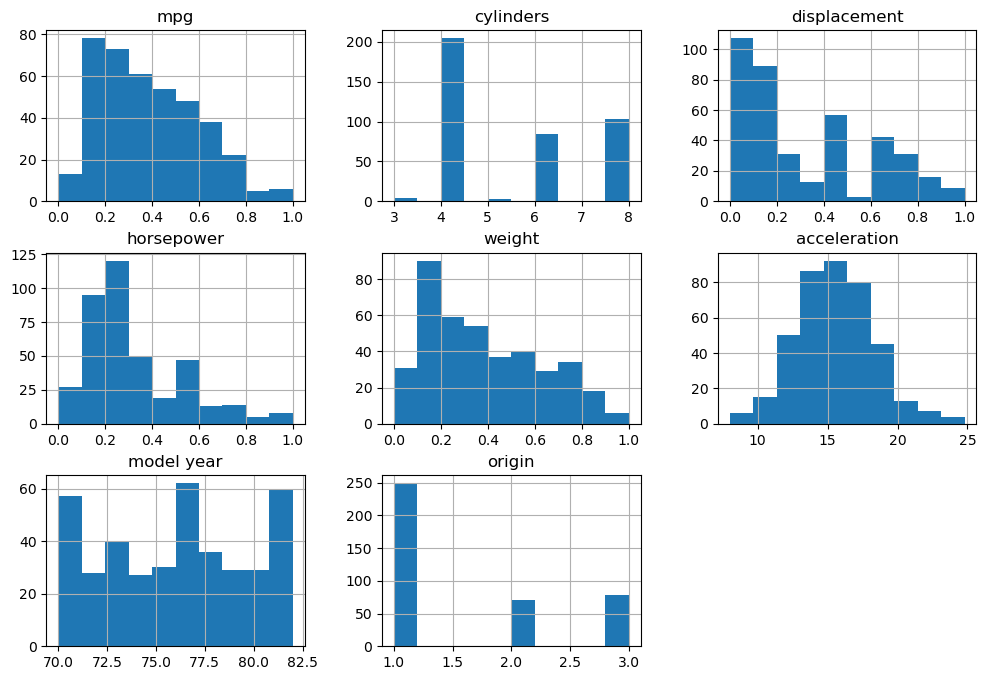

In [19]:
# NOTE to self: horsepower seems to be a str rather than a num
# I will fix this later


scalecol = ['displacement', 'horsepower', 'weight', 'mpg']
data_scaled = data.copy()
for col in scalecol:
    colmin = data_scaled[col].min()
    colmax = data_scaled[col].max()
    data_scaled[col] = (data_scaled[col]-colmin) / (colmax-colmin)

data_scaled.hist(figsize=(12,8));

**NOTE 2**: Changing scales does not change the shape of the histogram.

**Create a boxplot of mpg for different origin values before and after scaling.**

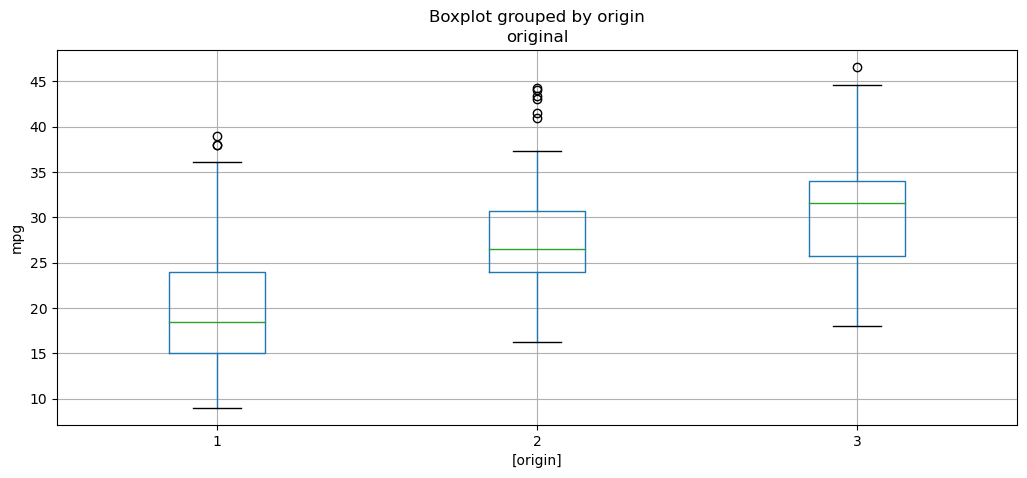

In [30]:
# Create a boxplot of mpg for different origin values before and after scaling.

df = pd.DataFrame(data={'original':data.mpg,'origin':data.origin})

fig = df.boxplot(by='origin', figsize=(12,5))
fig.set_ylabel('mpg');

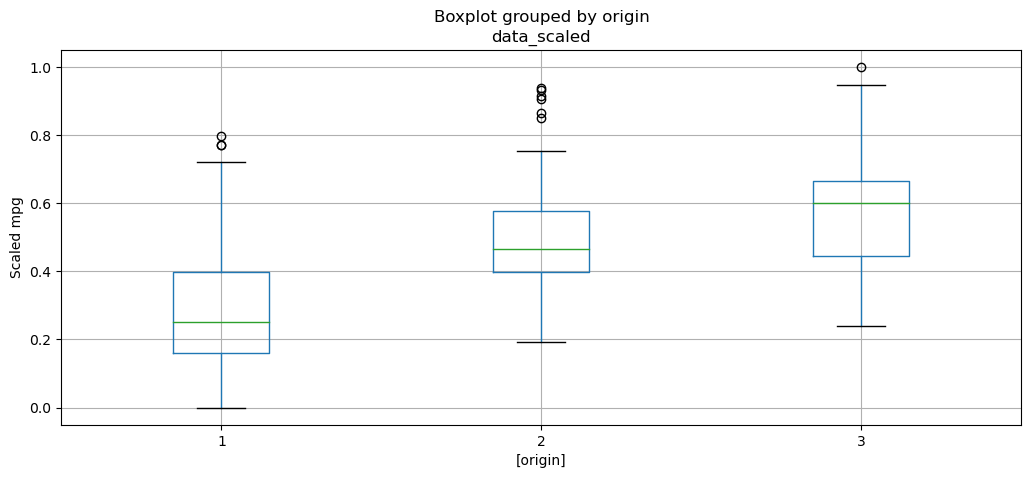

In [31]:
df = pd.DataFrame(data={'data_scaled':data_scaled.mpg,'origin':data.origin})

fig = df.boxplot(by='origin', figsize=(12,5))
fig.set_ylabel('Scaled mpg');

**NOTE 3**: The two boxplots are virtually identical given that one was scaled.